In [1]:
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt

fig_width = 4

swept_args = ['rec_loss_fn', 'lbd_opt_kwargs', 'separate_cls_partition']

In [5]:
results_dir = os.path.join('.', 'results', 'lagrangian_trial')
trial_dirs = [
    f for f in os.listdir(results_dir)
    if os.path.isdir(os.path.join(results_dir, f))
    and not '.' in f
    and f != 'pretrained_models'
]

def get_results():
    results = {**{arg: [] for arg in swept_args}, 'rec_loss': [], 'indcls_acc': []}
    for trial_dir in trial_dirs:
        for suffix in ['trial_info.pickle', os.path.join('validation', 'epoch_250.pickle'), os.path.join('validation', 'epoch_300.pickle')]:
            with open(os.path.join(results_dir, trial_dir, 'results', suffix), 'rb') as F:
                trial_results = pickle.load(F)
                for key, item in trial_results.items():
                    if key in results.keys():
                        results[key].append(item)
    return results

results = get_results()

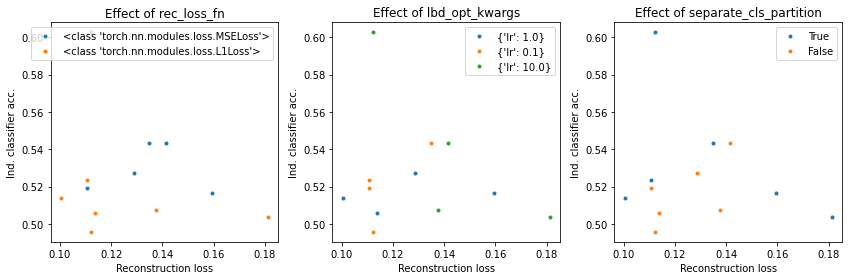

In [11]:
def get_traces_for_hparam(results, hparam):
    traces = {}
    for hval, rec_loss, indcls_acc in zip(results[hparam], results['rec_loss'], results['indcls_acc']):
        hval = str(hval)
        if not hval in traces.keys():
            traces[hval] = {'rec_loss': [], 'indcls_acc': []}
        traces[hval]['rec_loss'].append(rec_loss)
        traces[hval]['indcls_acc'].append(indcls_acc)
    return traces

fig, axes = plt.subplots(1, len(swept_args), figsize=(fig_width*len(swept_args), fig_width))
for ax, hparam in zip(axes.flatten(), swept_args):
    traces_dict = get_traces_for_hparam(results, hparam)
    for hval, traces in traces_dict.items():
        ax.plot(traces['rec_loss'], traces['indcls_acc'], '.', label=str(hval))
    ax.set_xlabel('Reconstruction loss')
    ax.set_ylabel('Ind. classifier acc.')
    ax.set_title('Effect of {}'.format(hparam))
    ax.legend()
plt.tight_layout()